In [7]:
# ---------- imports ----------
import pandas as pd, numpy as np
from pathlib import Path
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# ---------- setup paths ----------
csv_path = Path(r"C:\Users\SIMBY\Documents\climate_nasa.csv")
reports_dir = Path("reports")
(reports_dir / "figures").mkdir(parents=True, exist_ok=True)
(reports_dir / "tables").mkdir(parents=True, exist_ok=True)
(reports_dir / "pdf").mkdir(parents=True, exist_ok=True)

# ---------- load ----------
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
display(df.head())


Shape: (522, 5)


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [8]:
# ---------- handle missing ----------
df['text'] = df['text'].fillna("")
df['profileName'] = df['profileName'].fillna("Unknown")
df['likesCount'] = df['likesCount'].fillna(0)
df['commentsCount'] = df['commentsCount'].fillna(0)

# ---------- date features ----------
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# ---------- encode profile ----------
encoder = LabelEncoder()
df['profile_encoded'] = encoder.fit_transform(df['profileName'])

# ---------- text vectorization ----------
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_text = tfidf.fit_transform(df['text'])

# ---------- final features ----------
target = "likesCount"
X_meta = df[['commentsCount','year','month','day','weekday','profile_encoded']]
y = df[target]
X_final = hstack([X_text, X_meta.values])


In [10]:
# ---------- train/test split ----------
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# ---------- define models ----------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Import numpy for square root calculation

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# ---------- train & evaluate ----------
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),  # Calculate RMSE manually
        "R2": r2_score(y_test, y_pred)
    }

# ---------- summary table ----------
results_df = pd.DataFrame(results).T
display(results_df)
results_df.to_csv("reports/tables/model_results.csv")
print("Saved results to reports/tables/model_results.csv")

,MAE,RMSE,R2
Linear Regression,19.181995,28.888850,-3.644972
Random Forest,5.618381,15.034011,-0.257976
Gradient Boosting,6.589283,16.474342,-0.510563


Saved results to reports/tables/model_results.csv


# Assistant
The error occurs because the `squared` parameter in the `mean_squared_error` function is not available in the version of scikit-learn you're using. This parameter was introduced in scikit-learn version 0.22.0.

In older versions of scikit-learn, you need to calculate RMSE manually by taking the square root of MSE.

Would you like me to provide the corrected code?

In [12]:
# ---------- train/test split ----------
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# ---------- define models ----------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Added import for np.sqrt

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# ---------- train & evaluate ----------
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),  # Changed to manually calculate RMSE
        "R2": r2_score(y_test, y_pred)
    }

# ---------- summary table ----------
results_df = pd.DataFrame(results).T
display(results_df)
results_df.to_csv("reports/tables/model_results.csv")
print("Saved results to reports/tables/model_results.csv")

,MAE,RMSE,R2
Linear Regression,19.181995,28.888850,-3.644972
Random Forest,5.618381,15.034011,-0.257976
Gradient Boosting,6.589283,16.474342,-0.510563


Saved results to reports/tables/model_results.csv


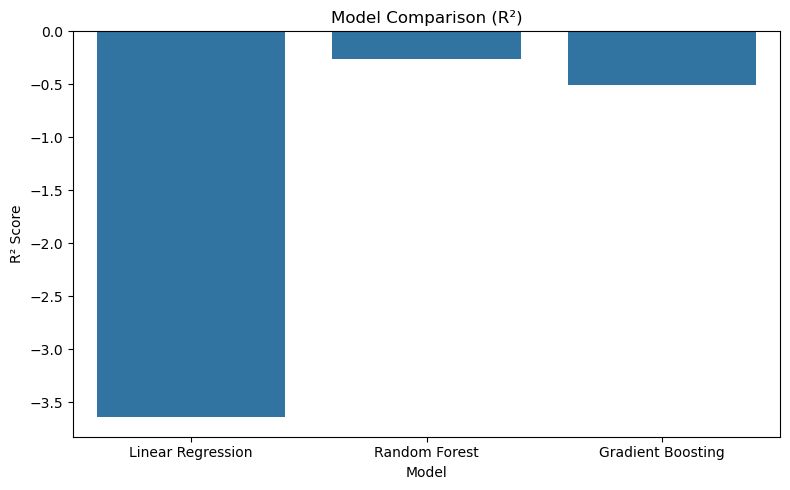

Saved figure: reports/figures/model_r2_comparison.png


In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.reset_index(), x="index", y="R2")
plt.title("Model Comparison (R²)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.tight_layout()
plt.savefig("reports/figures/model_r2_comparison.png")
plt.show()

print("Saved figure: reports/figures/model_r2_comparison.png")


In [14]:
# ---------- PDF report ----------
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

pdf_path = "reports/pdf/social_media_climate_report.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
styles = getSampleStyleSheet()
flowables = []

# --- Title ---
flowables.append(Paragraph("Social Media Climate Engagement Report", styles['Title']))
flowables.append(Spacer(1, 12))
flowables.append(Paragraph("This report analyzes social media engagement on climate change posts.", styles['Normal']))
flowables.append(Spacer(1, 12))

# --- Key metrics ---
for model, metrics in results.items():
    flowables.append(Paragraph(f"<b>{model}</b>: {metrics}", styles['Normal']))
    flowables.append(Spacer(1, 12))

# --- Add model comparison image ---
try:
    flowables.append(Image("reports/figures/model_r2_comparison.png", width=400, height=250))
except:
    flowables.append(Paragraph("Visualization not found.", styles['Normal']))

# --- Build report ---
doc.build(flowables)
print(f"✅ PDF report saved: {pdf_path}")


✅ PDF report saved: reports/pdf/social_media_climate_report.pdf
